# Beispiel 1: Berechnung des Molaren Extinktionskoeffizienten
Dieses Beispiel zeigt wie man den Molaren Extinktionskoeffizienten bestimmt, das muss man sowieso für jedes zweite Protokoll machen.
Dazu Tragen wir den Logarithmus der Intensität gegen die Konzentration auf. Die Steigung der Ausgleichsgeraden geteilt durch die Länge der Küvette ist dann der Molare Extinktionskoeffizient

In [7]:
# Allgemein: import <biblothek> as <abkürzung>
# Importiert alle funktionen der bibliothek, später aufrufbar mit <abkürzung.funktion>
# oder from <bibliothek> import <funktion> 
# Importiert nur eine einzelne funktion.
# Dann kann man sie einfach mit <funktion> aufrufen. Kein Präfix mehr nötig

import matplotlib.pyplot as plt

from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import log, sqrt

from jupyterpc import *
%matplotlib notebook

In [8]:
# Jetzt kommen die Messwerte dazu
# Datenreihen bekommen hier immer den prefix data_, Fehlerwerte immer sigma_
# Das ist nur meine konvention damit es übersichtlicher wird

c0_farbe = uf(1e-2, 1e-4)

#Fehlerwerte
sigma_v = 1
sigma_I = 0.1

# Werte für das zugegebene Volumen an Wasser
data_v_wasser = ua([990.0, 980.0, 950.0, 900.0, 800.0, 500.0], sigma_v) 

# Werte für die zugegebene Menge an Farbstoff-Lösung (0.01-Molar)
data_v_farb = ua([10.0, 20.0, 50.0, 100.0, 200.0, 500.0], sigma_v)

# Werte für die gemessene Intensität
data_I = ua([7.145, 6.955, 7.012, 6.708, 6.708, 5.616], sigma_I)

#Intensität ohne Farbstoff
I_0 = uf(8.23, sigma_I)

Zuerst muss die Konzentration des Farbstoffes in der Küvette für jede gewählte Konzentration Berechnet werden.
$$
c_{Küvette} = c_0\cdot\frac{v_{Farbstoff}}{v_{Farbstoff}+v_{Wasser}}
$$

Die Extinktion berechnet sich aus der Intensität
$$
E = log\left(\frac{I_0}{I}\right)
$$

Trägt man die Extinktion gegen die Farbstoffkonzentration auf, so enspricht die Steigung der 
Ausgleichsgeraden dem Molaren Extinkntionskoeffizienten.

$$
E = \epsilon c d\\
\leftrightarrow \frac{\delta E}{\delta c}\frac{1}{d} = \epsilon = \frac{m}{d}
$$

<IPython.core.display.Javascript object>


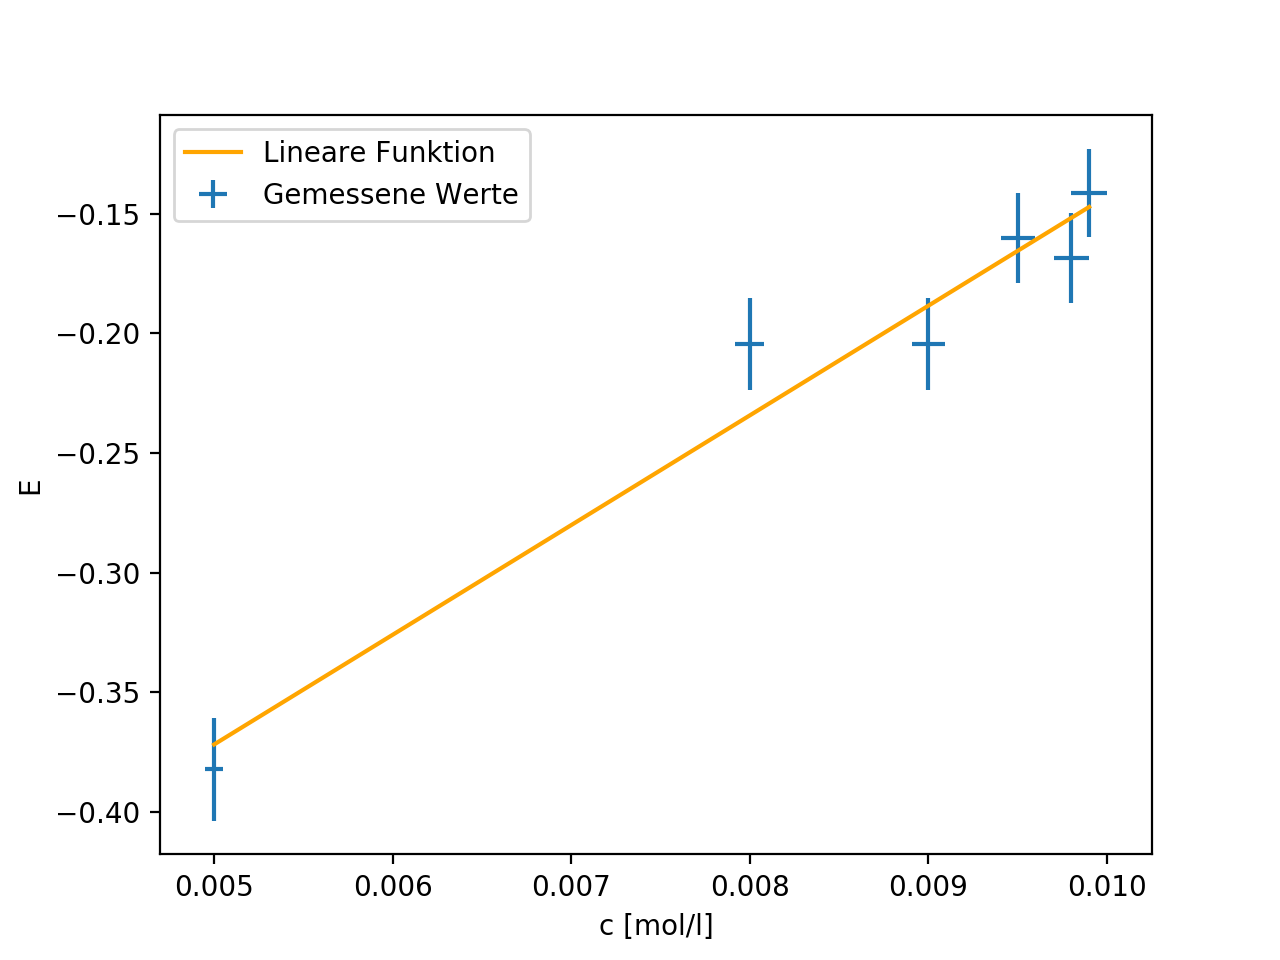

der Extinktionskoeffizient ist (22.9 \pm 2.6) \si{\liter\per\mol\per\centimerter}


In [9]:
# Zuerst rechnen wir die konzentration der jeweiligen lösungen aus. 
data_c = c0_farbe * data_v_wasser / (data_v_wasser+data_v_farb)

# Jetzt rechnen wir log(I/I0)=E aus
data_E = log(data_I/I_0)

#Jetzt können wir die ausgleichsgerade bestimmen
m, b = fit(data_c, data_E, beta=[12., 23]) 
# beta sind die startwerte für m und b für unseren linearen fir 

# Und die Grafik generieren

plt.figure()

# Achsenbeschriftung
plt.xlabel('c [mol/l]')
plt.ylabel('E')

# Werte
uplot(data_c, data_E, label='Gemessene Werte')

plt.plot(num(data_c), m.n*num(data_c)+b.n, color='orange', label='Lineare Funktion') # Ausgleichsgerade

plt.legend()

plt.savefig('grafik_1.pdf')
plt.show()

epsilon = m/uf(2, 0.01) # Küvette war 2cm +/- 0.01 dick

print('der Extinktionskoeffizient ist ('+sci(epsilon)+') \si{\liter\per\mol\per\centimerter}')

In [12]:
# Setzt die berechneten variablen an die mit \VAR{} markierten stellen ein und gibt es als output aus
render('bsp_1_vorlage.tex', 'bsp_1_output.tex', locals())